In [3]:
import numpy as np
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential



In [22]:
data_dir = "leapGestRecog"
img_height = 150
img_width = 150
batch_size = 64

In [23]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size= batch_size
)

Found 20000 files belonging to 10 classes.
Using 16000 files for training.


In [10]:

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
     

Found 20000 files belonging to 10 classes.
Using 4000 files for validation.


In [24]:
class_name = train_ds.class_names
class_name

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']

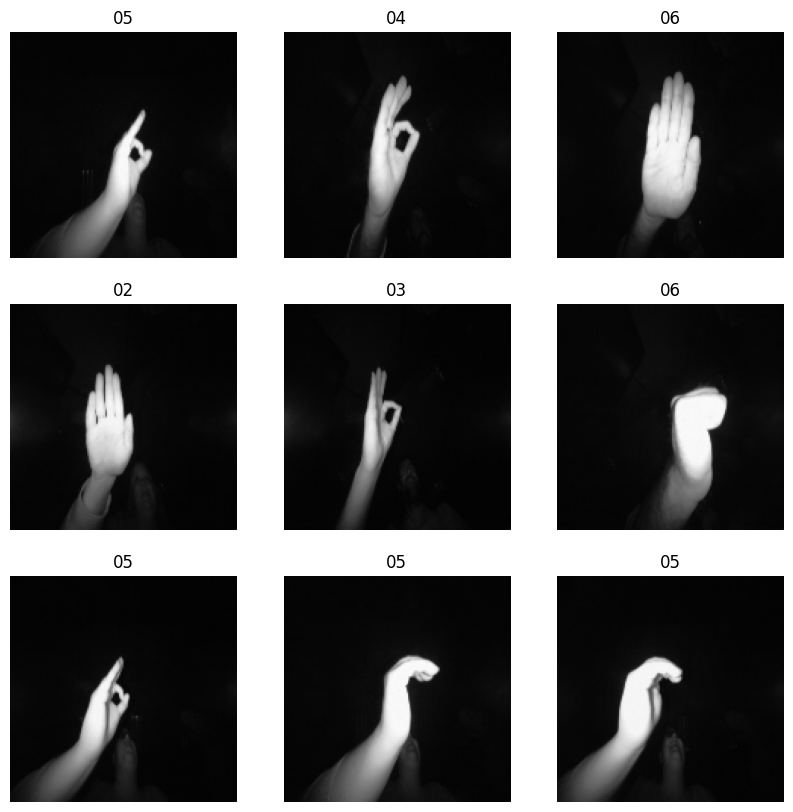

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_name[labels[i]])
        plt.axis("off")

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
num_classes = len(class_name)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="output")
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        1

In [15]:
epochs=10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


250/250 [==============================] - 117s 281ms/step - loss: 0.2529 - accuracy: 0.9156 - val_loss: 0.0417 - val_accuracy: 0.9912
Epoch 2/10
250/250 [==============================] - 65s 258ms/step - loss: 0.0240 - accuracy: 0.9902 - val_loss: 0.0147 - val_accuracy: 0.9937
Epoch 3/10
250/250 [==============================] - 64s 255ms/step - loss: 0.0171 - accuracy: 0.9921 - val_loss: 0.0208 - val_accuracy: 0.9942
Epoch 4/10
250/250 [==============================] - 64s 257ms/step - loss: 0.0184 - accuracy: 0.9906 - val_loss: 0.0181 - val_accuracy: 0.9940
Epoch 5/10
250/250 [==============================] - 69s 277ms/step - loss: 0.0176 - accuracy: 0.9909 - val_loss: 0.0104 - val_accuracy: 0.9945
Epoch 6/10
250/250 [==============================] - 65s 259ms/step - loss: 0.0139 - accuracy: 0.9914 - val_loss: 0.0085 - val_accuracy: 0.9948
Epoch 7/10
250/250 [==============================] - 65s 259ms/step - loss: 0.0147 - accuracy: 0.9918 - val_loss: 0.0104 - val

In [16]:
model.save("image_class.h5")

c:\Users\belim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
model.save('my_model.keras')

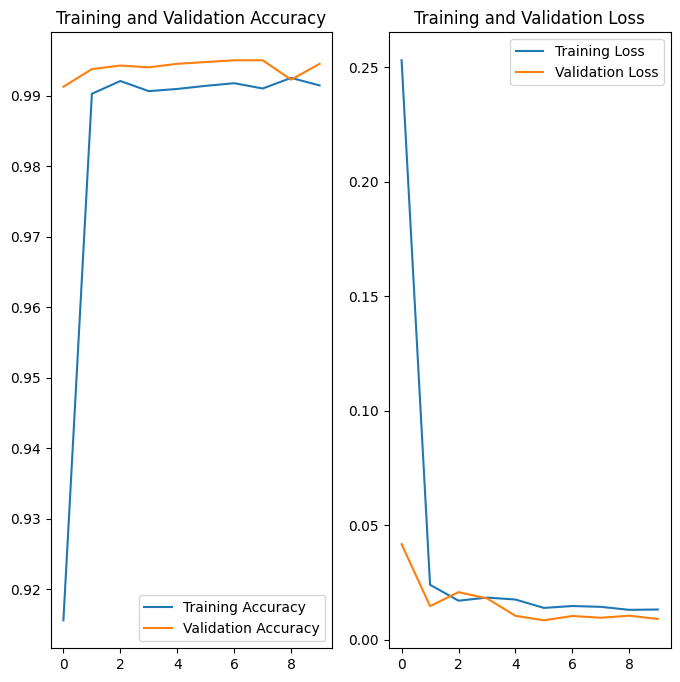

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
     